# **Project Team ID**
> **PTID-CDS-AUG-23-1627**
# **Project Name**
>**PRCP-1020-HousePricePred**

# **Problem Statement**

## **Task 1**:-
### Prepare a complete data analysis report on the given data.

## **Task 2**:-
### a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.
### b) Determine the relationship between the house features and how the price varies based on this.


## **Task3**:-
### Come up with suggestions for the customer to buy the house according to the area, price and other requirements.



In [67]:
# Imporing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [68]:
data=pd.read_csv("data.csv")
pd.reset_option('display.max_rows')

In [3]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# **Basic Checks**



In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

### **Insights**


* LotArea: Average lot size is 10,516 sq ft, ranging from 1,300 to 215,245 sq ft.
* OverallQual: Most houses rate between 5 and 8 in quality, with 5 being popular.
* YearBuilt: Average construction year is 1971, spanning 1872 to 2010.
* TotalBsmtSF: Avg. basement area is 1,057 sq ft, maxing at 6,110 sq ft.
* GrLivArea: Avg. above-ground living space is 1,515 sq ft, maxing at 5,642 sq ft.
* GarageCars: Most homes have 1 or 2-car garages.
* GarageArea: Avg. garage size is 473 sq ft, varying greatly.
* SalePrice: Prices range from 34,900 to 755,000, averaging $180,921.
* MoSold: Peak sales occur in summer (June-August).


In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [70]:
data.shape

(1460, 81)

In [71]:
# numerical columns
num_data = data.select_dtypes(include=["float64","int64"])
print("numerical columns",num_data.columns)

numerical columns Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [72]:
# categorical columns
cat_data=data.select_dtypes(include=["O"])
print("categorical columns",cat_data.columns)

categorical columns Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [10]:
num_data.shape

(1460, 38)

In [11]:
cat_data.shape

(1460, 43)

In [12]:
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("**********************")

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**********************
Street ['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64
**********************
Alley [nan 'Grvl' 'Pave']
Grvl    50
Pave    41
Name: Alley, dtype: int64
**********************
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
**********************
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
**********************
Utilities ['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
**********************
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
**********************
LandSlope ['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev    

In [13]:
data.duplicated().sum()

0

# **Exploratory Data Analysis**

## **Univariant Analysis**

In [73]:
# !pip install sweetviz

In [74]:
# import sweetviz as sv
# my_report = sv.analyze(data)
# my_report.show_html()

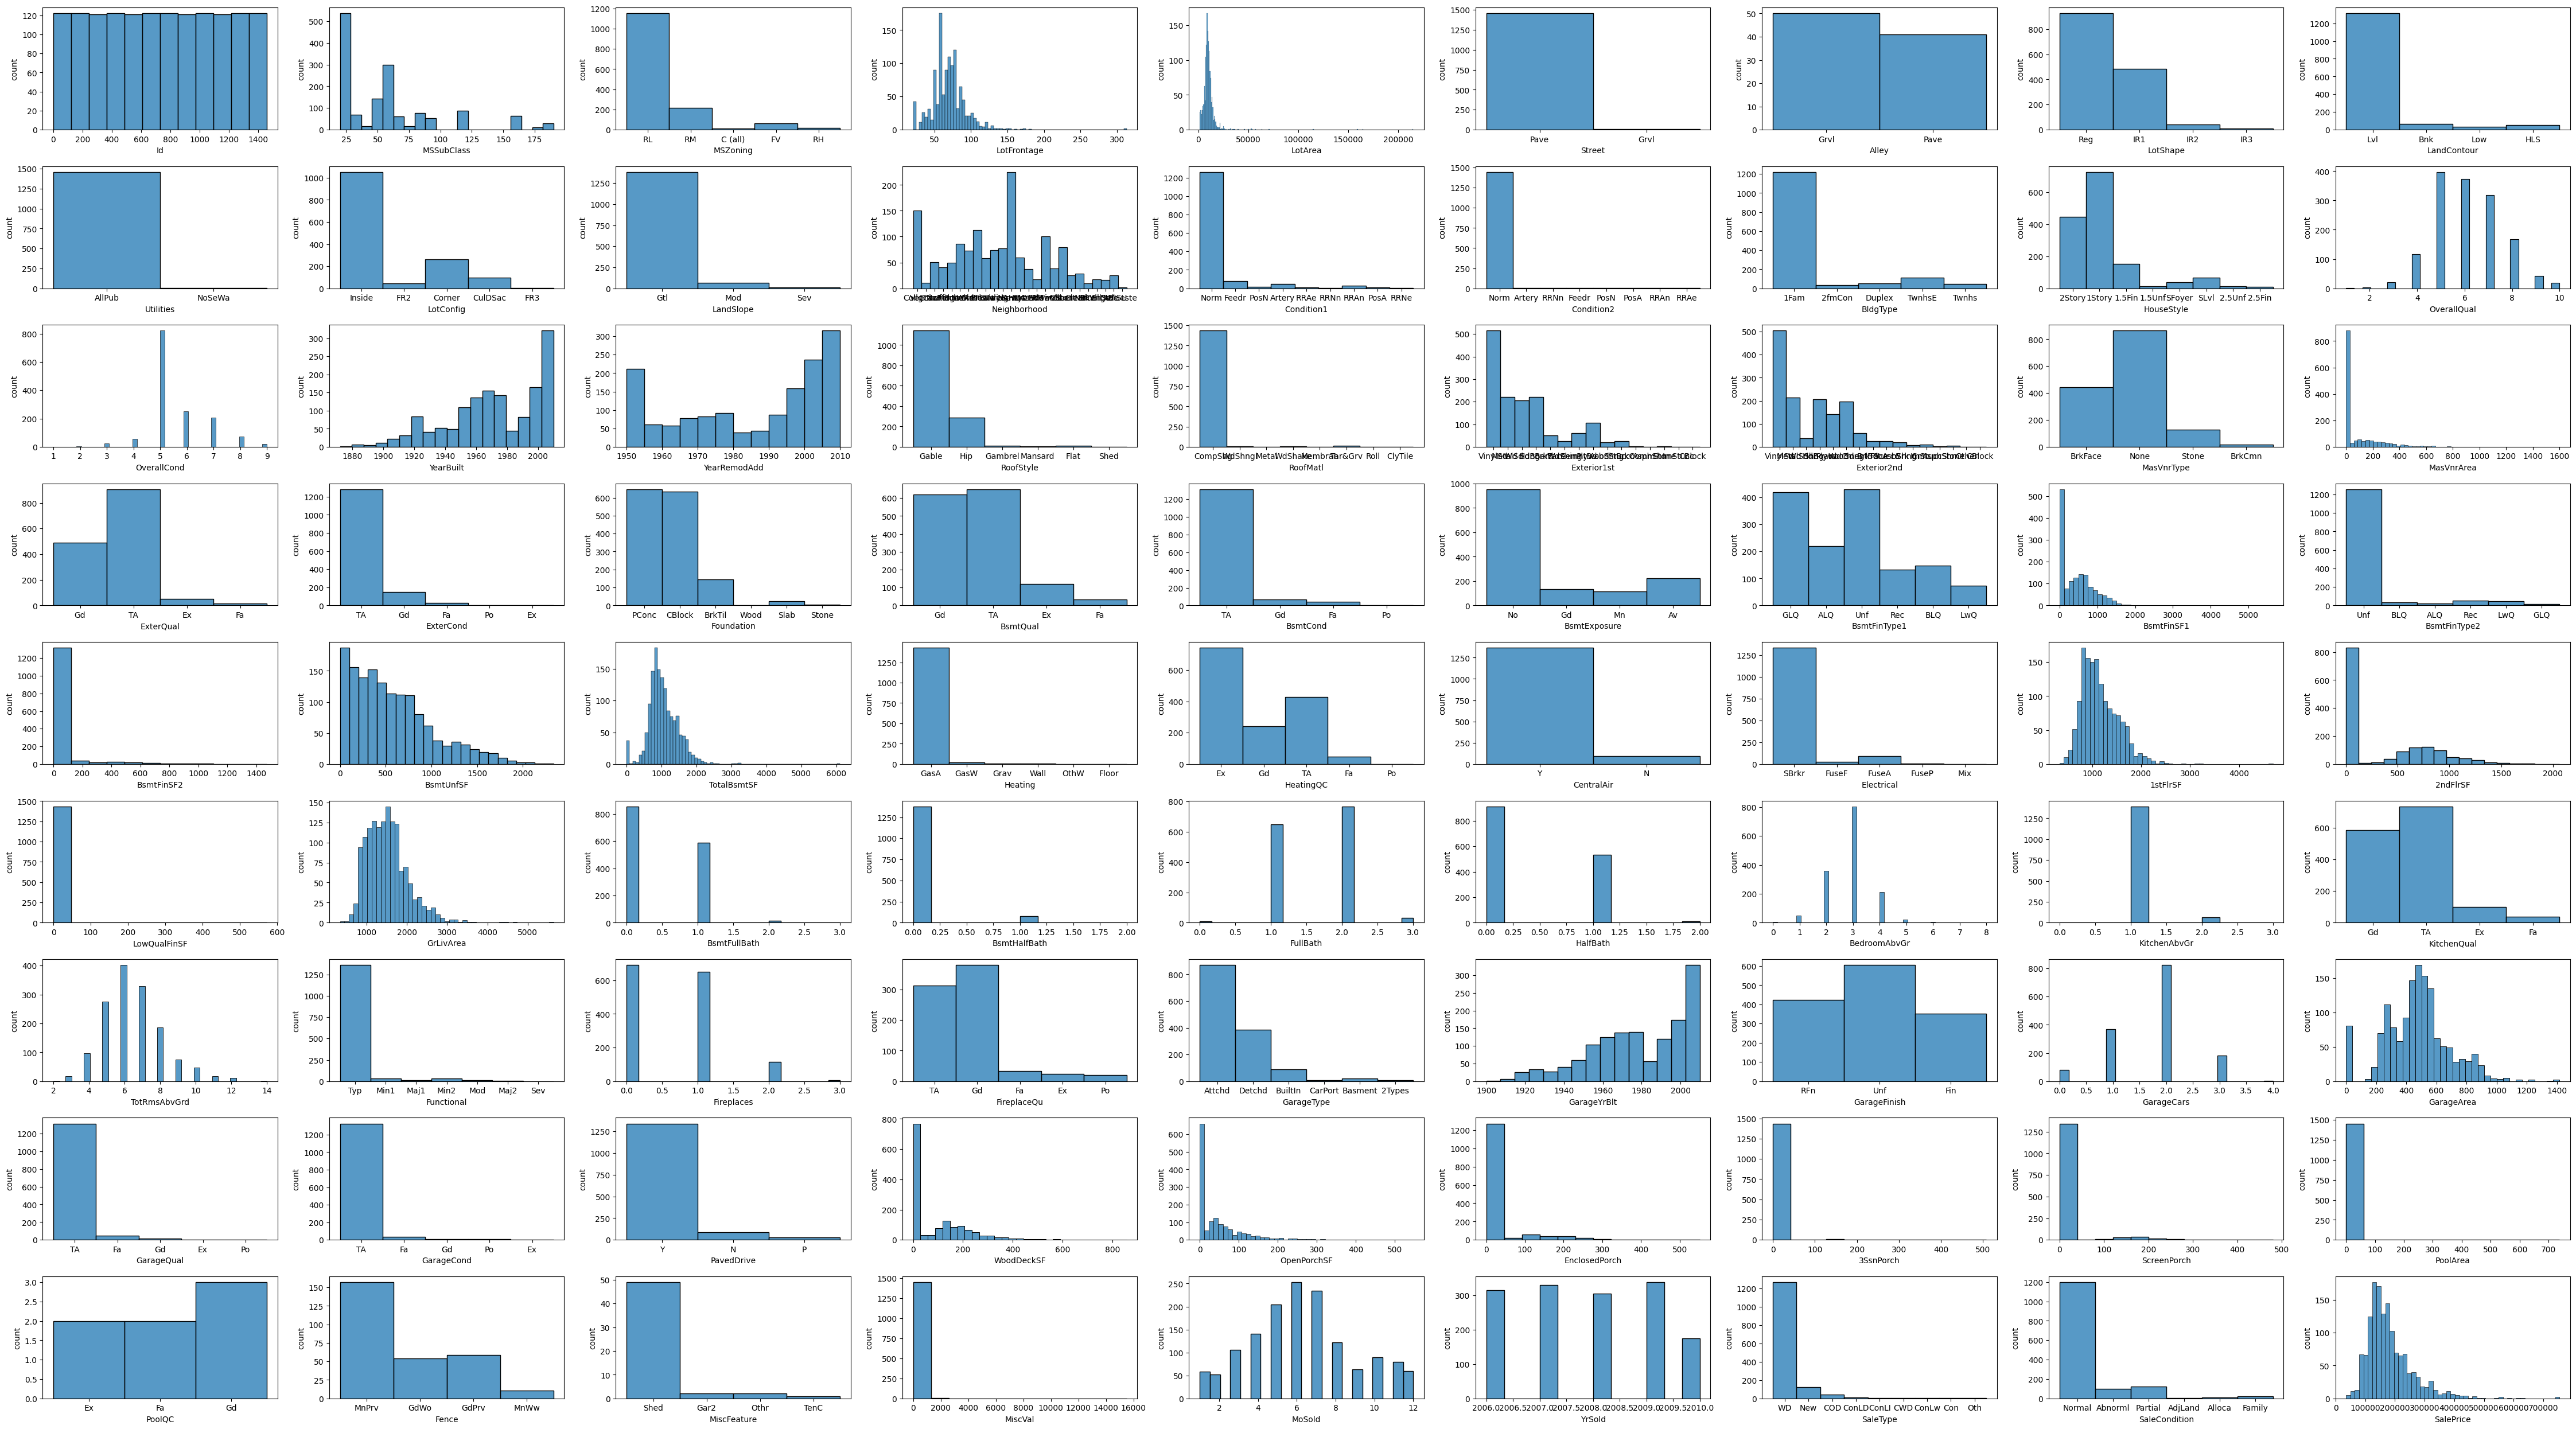

In [16]:

plt.figure(figsize=(45,25),facecolor='white')
plotnumber=1

for column in data:
  if plotnumber<=81:
    ax=plt.subplot(9,9,plotnumber)
    sns.histplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("count",fontsize=10)
  plotnumber+=1
plt.tight_layout()


### **Insights from univariant analysis**



* Zoning Preference: Most homeowners favor RL zoning (Residential Low Density).
* Lot Frontage: The ideal lot frontage for many falls between 50 to 100 feet.
* Street Preference: Paved streets are overwhelmingly preferred.
* Lot Shape: Regular and slightly irregular lot shapes are popular choices.
* Property Flatness: Nearly all buyers seek level properties.
* Utilities: All-public utilities are unanimously favored.
* Lot Configuration: "Inside" lot configurations are highly sought after.
* Slope Preference: Gentle slopes are the preferred terrain for many.
* Condition Norm: "Normal" conditions dominate in both Condition1 and Condition2 preferences.
* Dwelling Type: Single-family homes remain the top choice.
* Quality Rating: Buyers tend to gravitate towards OverallQual ratings of 5 - 8, with 5 being particularly popular.
* Year of Construction: Newer homes built after 2000 are the preferred choice.
* Roofing: Gable roofs with CompShg roofing materials are in high demand.
* Pools: Pools are not a top priority for most buyers.
* Garage Preference: Attached garages are the favored option.
* Foundation Types: Pconc and CBlock foundations have a substantial following.
* Bedroom Count: Three bedrooms are the preferred configuration for half of the buyers.
* Shed Inclination: Over 80% of buyers prefer houses with sheds.
* Garage Size: Garage areas ranging from 400 to 600 sq ft are popular, preferred by 35%.
* Price Range: The majority of houses fall within the 100k to 200k price range.

## **Bivariant Analysis**

In [17]:
cat_data.shape

(1460, 43)

In [18]:
num_data.shape

(1460, 38)

In [19]:
target=data['SalePrice']

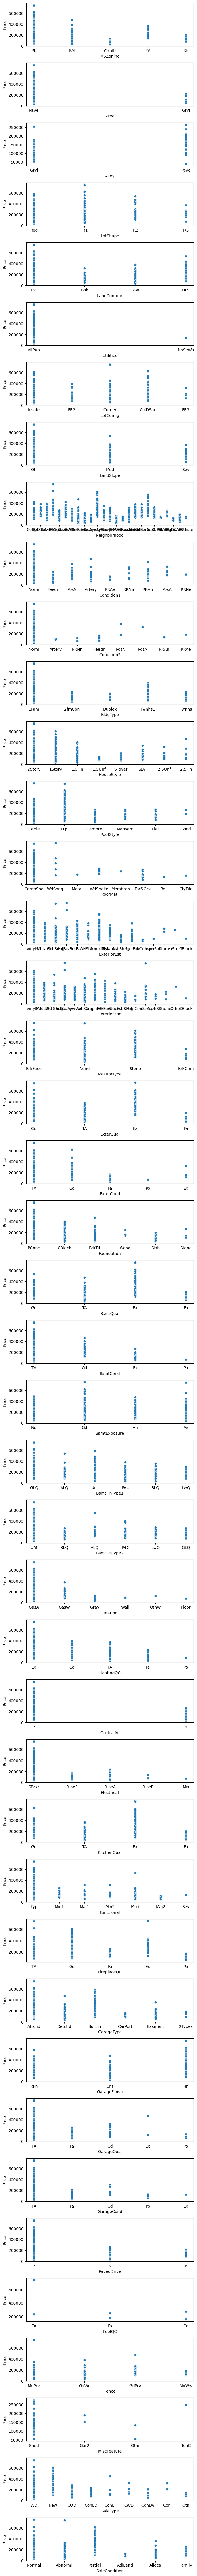

In [20]:

plt.figure(figsize=(7,90),facecolor='white')
plotnumber=1

for column in cat_data:
  if plotnumber<=43:
    ax=plt.subplot(43,1,plotnumber)
    sns.scatterplot(data=cat_data,x=column,y=target)
    plt.xlabel(column,fontsize=10)
    plt.ylabel("Price",fontsize=10)
  plotnumber+=1
plt.tight_layout()


### **Insights from Biivariant analysis Categorical columns**

* Homes in areas zoned as "MSZoning" tend to have higher prices compared to other zones.
* Properties with paved streets command significantly higher prices than those with gravel streets. However, the type of alley access doesn't have a substantial impact on prices.
* Properties with a "Lvl" (near flat/level) land contour tend to have higher prices compared to other contour types.
* Homes in "Normal" conditions (both Condition1 and Condition2) have higher prices compared to other condition types.
* Two-story and one-story house styles are associated with higher prices.
* Homes with a "CompShg" roof material tend to be priced higher than those with other materials.
* Properties with an attached garage ("Attchd" GarageType) generally have higher prices compared to other garage types.
* Finished and roughly finished garages command higher prices than unfinished garages.
* Homes with an "Average" GarageQual rating tend to have higher prices than those with other ratings.
* Properties with a paved driveway ("Y" in PavedDrive) have higher prices than those with partial or dirt driveways.
* Homes with a shed as a miscellaneous feature tend to have higher prices than those with other features.
* "Warranty Deed" SaleType and "Normal" SaleCondition are associated with higher property prices compared to other sales types and conditions.

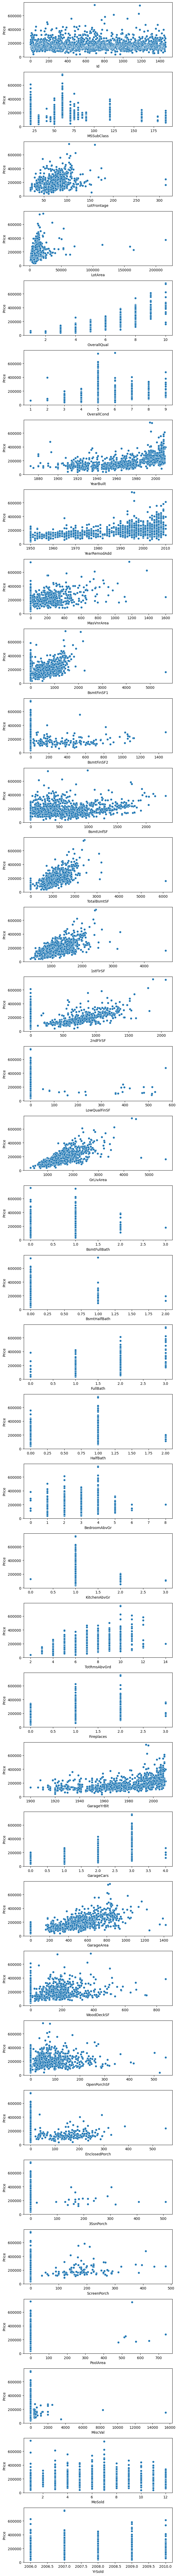

In [21]:

plt.figure(figsize=(7,100),facecolor='white')
plotnumber=1

for column in num_data:
  if plotnumber<=37:
    ax=plt.subplot(37,1,plotnumber)
    sns.scatterplot(data=num_data.drop(["SalePrice"],axis=1),x=column,y=target)
    plt.xlabel(column,fontsize=10)
    plt.ylabel("Price",fontsize=10)
  plotnumber+=1
plt.tight_layout()


### **Insights from Biivariant analysis Numerical columns**

* House prices tend to be higher for "MSSubClass" categories 20 (1-STORY 1946 & NEWER ALL STYLES), 60 (2-STORY 1946 & NEWER), and 70 (2-STORY 1945 & OLDER) compared to other categories.
* Properties with a "LotFrontage" between 100 to 150 tend to command higher house prices.
* As the "OverallQual" rating increases, house prices also increase.
* More recently built and remodeled houses tend to have higher prices.
* Higher "TotalBsmtSF" (Total square feet of basement area) is associated with higher house prices.
* Larger "1stFlrSF" (First Floor square feet) and "2ndFlrSF" (Second floor square feet) result in higher house prices.
* Expansive "GrLivArea" (above-grade living area square feet) corresponds to higher house prices.
* Properties with a higher grade of "FullBath" tend to have higher house prices.
* A higher grade of "TotRmsAbvGrd" (total rooms above grade) is linked to higher house prices.
* Increasing "GarageArea" is associated with higher house prices.

# **Data Preprocessing**

## **Handling missing values**

In [22]:
#total number of null columns
null_counts=data.isnull().sum()
significant_null_columns = null_counts[null_counts > 0]

print("\nColumns with significant null values:")
print(significant_null_columns)


Columns with significant null values:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [23]:
(significant_null_columns/len(data))*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [24]:
# columns to drop
# Alley, PoolQC, Fence, MiscFeature
# because these columns have missing values more than 50%
# and we removed the Id column since it has no use

In [25]:
data.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [26]:
data.shape

(1460, 76)

In [27]:
data

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 76 columns]

In [28]:
# separating missing values of categorical and numerical columns
column_names = ["LotFrontage", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond",
"BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical",
"FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish",
"GarageQual", "GarageCond"]


df = data

numerical_columns = []
categorical_columns = []

for column in column_names:
    data_type = df[column].dtype
    if pd.api.types.is_numeric_dtype(data_type):
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)

print("Numerical Columns:")
print(numerical_columns)

print("Categorical Columns:")
print(categorical_columns)


Numerical Columns:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
Categorical Columns:
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [29]:
# the categorical columns which we should handle missing values are
''' "LotFrontage", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond",
"BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical",
"FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish",
"GarageQual", "GarageCond" '''

' "LotFrontage", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond",\n"BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical",\n"FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish",\n"GarageQual", "GarageCond" '

In [30]:
# handling all categorical missing values

In [31]:
# to handle missing value in categorical column we select mode and check the value
df=data
columns_to_check = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

modes = df[columns_to_check].mode()
print("Modes of specified columns:     ")
print(modes)

Modes of specified columns:     
  MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0       None       TA       TA           No          Unf          Unf   

  Electrical FireplaceQu GarageType GarageFinish GarageQual GarageCond  
0      SBrkr          Gd     Attchd          Unf         TA         TA  


In [32]:
data.loc[data['MasVnrType'].isnull()==True,"MasVnrType"]="None"
data.loc[data['BsmtQual'].isnull()==True,"BsmtQual"]="TA"
data.loc[data['BsmtCond'].isnull()==True,"BsmtCond"]="TA"
data.loc[data['BsmtExposure'].isnull()==True,"BsmtExposure"]="No"
data.loc[data['BsmtFinType1'].isnull()==True,"BsmtFinType1"]="Unf"
data.loc[data['BsmtFinType2'].isnull()==True,"BsmtFinType2"]="Unf"
data.loc[data['Electrical'].isnull()==True,"Electrical"]="SBkr"
data.loc[data['FireplaceQu'].isnull()==True,"FireplaceQu"]="Gd"
data.loc[data['GarageType'].isnull()==True,"GarageType"]="Attchd"
data.loc[data['GarageFinish'].isnull()==True,"GarageFinish"]="Unf"
data.loc[data['GarageQual'].isnull()==True,"GarageQual"]="TA"
data.loc[data['GarageCond'].isnull()==True,"GarageCond"]="TA"

In [33]:
# categorical columns with 0 null values
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [34]:
# Numerical Columns to handle missing values are:
# ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# And now we will handle the numerical columns of missing values
# since all the numerical are skewed so we go with the median

In [35]:
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=data['LotFrontage'].median()
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=data['MasVnrArea'].median()
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']=data['GarageYrBlt'].median()

In [36]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [37]:
# we successfully handled all missing values

## **Conversion of Categorical variables**

In [38]:
cat_data=data.select_dtypes(include=["O"])
print("categorical columns",cat_data.columns)

categorical columns Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [39]:
cat_data.shape

(1460, 39)

In [40]:
#checking the unique values to replace with numbers
num=1
for i in cat_data:
    print(num,i,data[i].unique())
    num+=1

1 MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 Street ['Pave' 'Grvl']
3 LotShape ['Reg' 'IR1' 'IR2' 'IR3']
4 LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
5 Utilities ['AllPub' 'NoSeWa']
6 LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
7 LandSlope ['Gtl' 'Mod' 'Sev']
8 Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
9 Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
10 Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
11 BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
12 HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
13 RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
14 RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
15 Exterior1st ['VinylSd'

In [41]:
# we used manual encoding

data.MSZoning = data.MSZoning.map({'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4})
data.Street = data.Street.map({'Pave': 1, 'Grvl': 0})
data.LotShape = data.LotShape.map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})
data.LandContour = data.LandContour.map({'Lvl': 0, 'Bnk': 1, 'Low': 2, 'HLS': 3})
data.Utilities = data.Utilities.map({'AllPub': 1, 'NoSeWa': 0})
data.LotConfig = data.LotConfig.map({'Inside': 0, 'FR2': 1, 'Corner': 2, 'CulDSac': 3, 'FR3': 4})
data.LandSlope = data.LandSlope.map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
data.Neighborhood = data.Neighborhood.map({'CollgCr': 0, 'Veenker': 1, 'Crawfor': 2, 'NoRidge': 3, 'Mitchel': 4, 'Somerst': 5, 'NWAmes': 6, 'OldTown': 7, 'BrkSide': 8, 'Sawyer': 9, 'NridgHt': 10, 'NAmes': 11, 'SawyerW': 12, 'IDOTRR': 13, 'MeadowV': 14, 'Edwards': 15, 'Timber': 16, 'Gilbert': 17, 'StoneBr': 18, 'ClearCr': 19, 'NPkVill': 20, 'Blmngtn': 21, 'BrDale': 22, 'SWISU': 23, 'Blueste': 24})
data.Condition1 = data.Condition1.map({'Norm': 0, 'Feedr': 1, 'PosN': 2, 'Artery': 3, 'RRAe': 4, 'RRNn': 5, 'RRAn': 6, 'PosA': 7, 'RRNe': 8})
data.Condition2 = data.Condition2.map({'Norm': 0, 'Artery': 1, 'RRNn': 2, 'Feedr': 3, 'PosN': 4, 'PosA': 5, 'RRAn': 6, 'RRAe': 7})
data.BldgType = data.BldgType.map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'TwnhsE': 3, 'Twnhs': 4})
data.HouseStyle = data.HouseStyle.map({'2Story': 0, '1Story': 1, '1.5Fin': 2, '1.5Unf': 3, 'SFoyer': 4, 'SLvl': 5, '2.5Unf': 6, '2.5Fin': 7})
data.RoofStyle = data.RoofStyle.map({'Gable': 0, 'Hip': 1, 'Gambrel': 2, 'Mansard': 3, 'Flat': 4, 'Shed': 5})
data.RoofMatl = data.RoofMatl.map({'CompShg': 0, 'WdShngl': 1, 'Metal': 2, 'WdShake': 3, 'Membran': 4, 'Tar&Grv': 5, 'Roll': 6, 'ClyTile': 7})
data.Exterior1st = data.Exterior1st.map({'VinylSd': 0, 'MetalSd': 1, 'Wd Sdng': 2, 'HdBoard': 3, 'BrkFace': 4, 'WdShing': 5, 'CemntBd': 6, 'Plywood': 7, 'AsbShng': 8, 'Stucco': 9, 'BrkComm': 10, 'AsphShn': 11, 'Stone': 12, 'ImStucc': 13, 'CBlock': 14})
data.Exterior2nd = data.Exterior2nd.map({'VinylSd': 0, 'MetalSd': 1, 'Wd Shng': 2, 'HdBoard': 3, 'Plywood': 4, 'Wd Sdng': 5, 'CmentBd': 6, 'BrkFace': 7, 'Stucco': 8, 'AsbShng': 9, 'Brk Cmn': 10, 'ImStucc': 11, 'AsphShn': 12, 'Stone': 13, 'Other': 14, 'CBlock': 15})
data.MasVnrType = data.MasVnrType.map({'BrkFace': 0, 'None': 1, 'Stone': 2, 'BrkCmn': 3})
data.ExterQual = data.ExterQual.map({'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3})
data.ExterCond = data.ExterCond.map({'TA': 0, 'Gd': 1, 'Fa': 2, 'Po': 3, 'Ex': 4})
data.Foundation = data.Foundation.map({'PConc': 0, 'CBlock': 1, 'BrkTil': 2, 'Wood': 3, 'Slab': 4, 'Stone': 5})
data.BsmtQual = data.BsmtQual.map({'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3})
data.BsmtCond = data.BsmtCond.map({'TA': 0, 'Gd': 1, 'Fa': 2, 'Po': 3})
data.BsmtExposure = data.BsmtExposure.map({'No': 0, 'Gd': 1, 'Mn': 2, 'Av': 3})
data.BsmtFinType1 = data.BsmtFinType1.map({'GLQ': 0, 'ALQ': 1, 'Unf': 2, 'Rec': 3, 'BLQ': 4, 'LwQ': 5})
data.BsmtFinType2 = data.BsmtFinType2.map({'Unf': 0, 'BLQ': 1, 'ALQ': 2, 'Rec': 3, 'LwQ': 4, 'GLQ': 5})
data.Heating = data.Heating.map({'GasA': 0, 'GasW': 1, 'Grav': 2, 'Wall': 3, 'OthW': 4, 'Floor': 5})
data.HeatingQC = data.HeatingQC.map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
data.CentralAir = data.CentralAir.map({'Y': 1, 'N': 0})
data.Electrical = data.Electrical.map({'SBrkr': 0, 'FuseF': 1, 'FuseA': 2, 'FuseP': 3, 'Mix': 4, 'SBkr': 5})
data.KitchenQual = data.KitchenQual.map({'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3})
data.Functional = data.Functional.map({'Typ': 0, 'Min1': 1, 'Maj1': 2, 'Min2': 3, 'Mod': 4, 'Maj2': 5, 'Sev': 6})
data.FireplaceQu = data.FireplaceQu.map({'Gd': 0, 'TA': 1, 'Fa': 2, 'Ex': 3, 'Po': 4})
data.GarageType = data.GarageType.map({'Attchd': 0, 'Detchd': 1, 'BuiltIn': 2, 'CarPort': 3, 'Basment': 4, '2Types': 5})
data.GarageFinish = data.GarageFinish.map({'RFn': 0, 'Unf': 1, 'Fin': 2})
data.GarageQual = data.GarageQual.map({'TA': 0, 'Fa': 1, 'Gd': 2, 'Ex': 3, 'Po': 4})
data.GarageCond = data.GarageCond.map({'TA': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'Ex': 4})
data.PavedDrive = data.PavedDrive.map({'Y': 1, 'N': 0, 'P': 2})
data.SaleType = data.SaleType.map({'WD': 0, 'New': 1, 'COD': 2, 'ConLD': 3, 'ConLI': 4, 'CWD': 5, 'ConLw': 6, 'Con': 7, 'Oth': 8})
data.SaleCondition = data.SaleCondition .map({'Normal': 0, 'Abnorml': 1, 'Partial': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5})

In [42]:
cat_data=data.select_dtypes(include=["O"])
print("categorical columns",cat_data.columns)

categorical columns Index([], dtype='object')


In [43]:
num=1
for i in cat_data:
    print(num,i,data[i].unique())
    num+=1

In [44]:
# there are no categorical columns now
# done manual encoding

## **Feature Engineering**

In [45]:
num_data.head(10)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
5   6          50         85.0    14115            5            5       1993   
6   7          20         75.0    10084            8            5       2004   
7   8          60          NaN    10382            7            6       1973   
8   9          50         51.0     6120            7            5       1931   
9  10         190         50.0     7420            5            6       1939   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   
5          1995         0.0         732  ...          40           30   
6          2005       186.0        1369  ...         255           57   
7          1973       240.0         859  ...         235          204   
8          1950         0.0           0  ...          90            0   
9          1950         0.0         851  ...           0            4   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   
5              0        320            0         0      700      10    2009   
6              0          0            0         0        0       8    2007   
7            228          0            0         0      350      11    2009   
8            205          0            0         0        0       4    2008   
9              0          0            0         0        0       1    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  
5     143000  
6     307000  
7     200000  
8     129900  
9     118000  

[10 rows x 38 columns]

In [46]:
# since Id is no use
num_data.drop(["Id"],axis=1,inplace=True)

In [47]:
num_data.shape

(1460, 37)

In [48]:
num_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: >

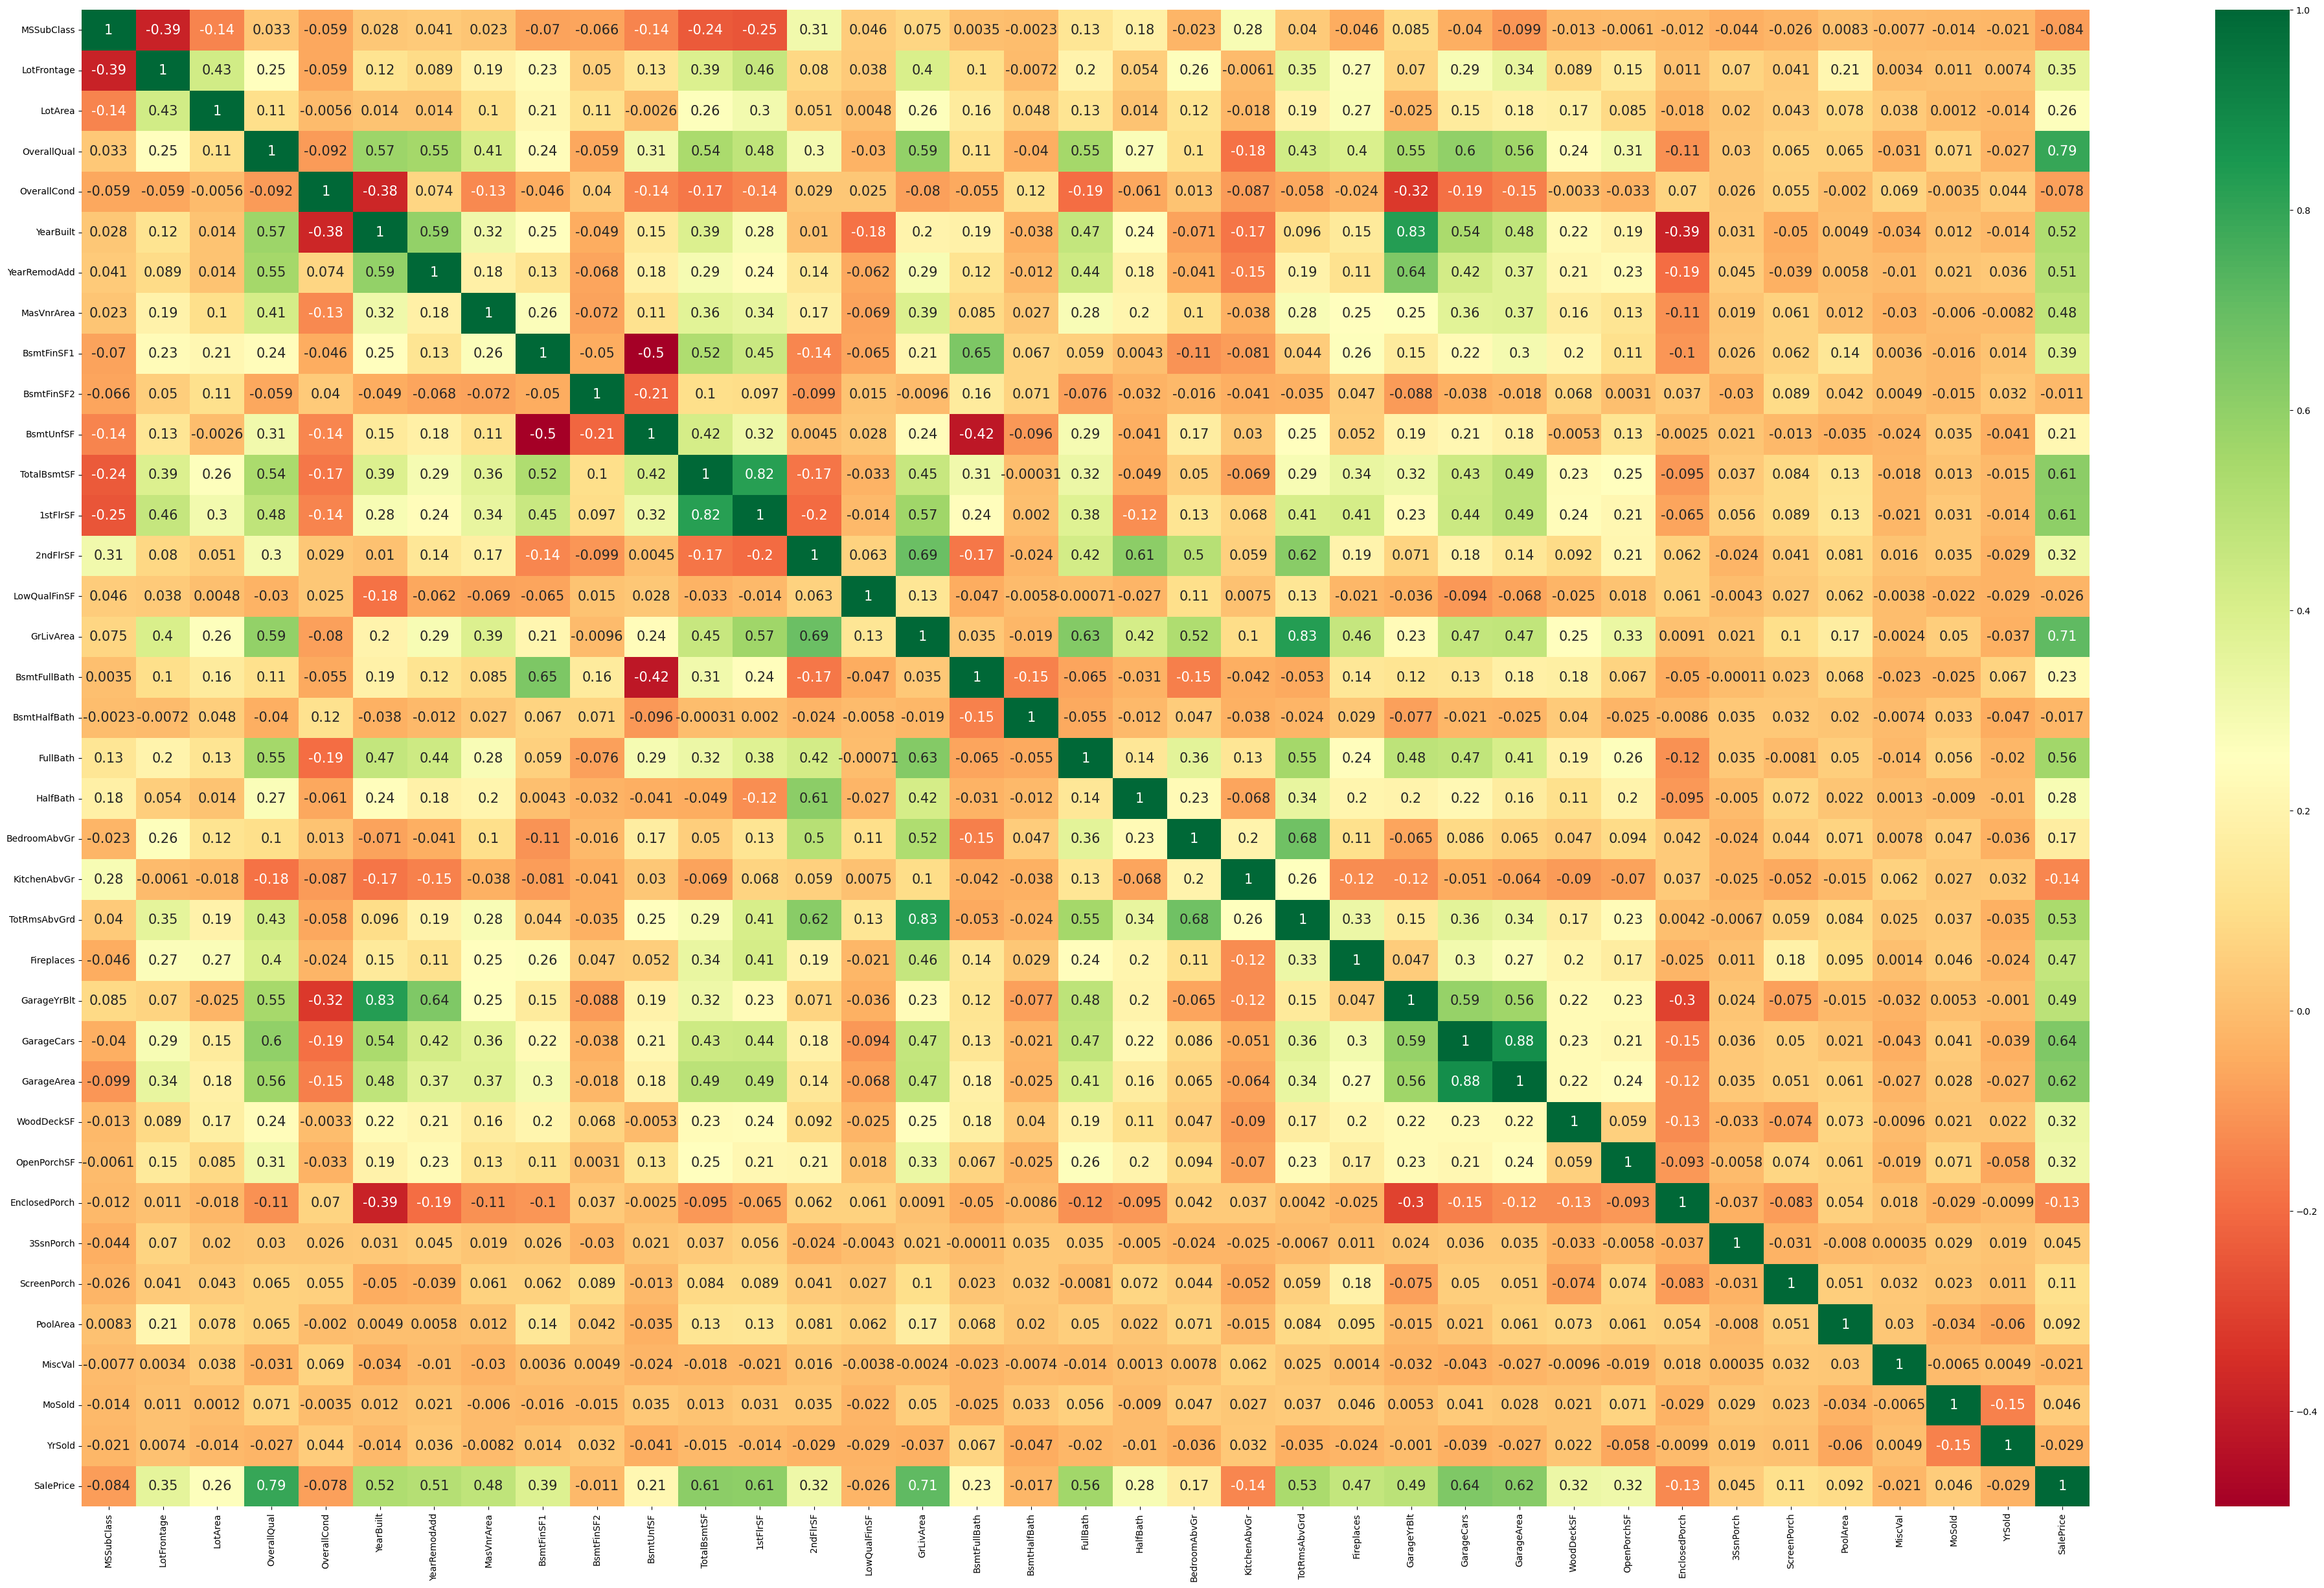

In [49]:

# checking the correlation in numerical columns
plt.figure(figsize=(50, 30))
sns.heatmap(num_data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})


In [50]:
# Column "YearBuilt" and "GarageYrBlt" have a correlation of 0.83
# Column "TotalBsmtSF" and "1stFlrSF" have a correlation of 0.82
# Column "GrLivArea" and "TotRmsAbvGrd" have a correlation of 0.83
# Column "GarageCars" and "GarageArea" have a correlation of 0.88

In [51]:
num_data.drop(["GarageYrBlt","1stFlrSF","TotRmsAbvGrd","GarageCars"],axis=1,inplace=True)

In [52]:
# so we drop one of these
data.drop(["GarageYrBlt","1stFlrSF","TotRmsAbvGrd","GarageCars"],axis=1,inplace=True)

In [53]:
# checking the columns which have least corelations with target values
from logging import NullHandler

df = num_data
correlations = df.corr()['SalePrice']
filtered_correlations = correlations[(correlations >= -0.1) & (correlations <= 0.2)]
print(filtered_correlations)


MSSubClass     -0.084284
OverallCond    -0.077856
BsmtFinSF2     -0.011378
LowQualFinSF   -0.025606
BsmtHalfBath   -0.016844
BedroomAbvGr    0.168213
3SsnPorch       0.044584
ScreenPorch     0.111447
PoolArea        0.092404
MiscVal        -0.021190
MoSold          0.046432
YrSold         -0.028923
Name: SalePrice, dtype: float64


In [54]:
# dropping the columns
num_data.drop(["MSSubClass", "OverallCond", "BsmtFinSF2",
               "LowQualFinSF", "BsmtHalfBath", "BedroomAbvGr",
              "3SsnPorch", "ScreenPorch", "PoolArea",
               "MiscVal", "MoSold", "YrSold"],axis=1,inplace=True)

In [55]:
# dropping the columns in dataset
data.drop(["MSSubClass", "OverallCond", "BsmtFinSF2","LowQualFinSF", "BsmtHalfBath", "BedroomAbvGr","3SsnPorch", "ScreenPorch", "PoolArea","MiscVal", "MoSold", "YrSold"],axis=1,inplace=True)

In [56]:
data

MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0            0         65.0     8450       1         0            0   
1            0         80.0     9600       1         0            0   
2            0         68.0    11250       1         1            0   
3            0         60.0     9550       1         1            0   
4            0         84.0    14260       1         1            0   
...        ...          ...      ...     ...       ...          ...   
1455         0         62.0     7917       1         0            0   
1456         0         85.0    13175       1         0            0   
1457         0         66.0     9042       1         0            0   
1458         0         68.0     9717       1         0            0   
1459         0         75.0     9937       1         0            0   

      Utilities  LotConfig  LandSlope  Neighborhood  ...  GarageArea  \
0             1          0          0             0  ...         548   
1             1          1          0             1  ...         460   
2             1          0          0             0  ...         608   
3             1          2          0             2  ...         642   
4             1          1          0             3  ...         836   
...         ...        ...        ...           ...  ...         ...   
1455          1          0          0            17  ...         460   
1456          1          0          0             6  ...         500   
1457          1          0          0             2  ...         252   
1458          1          0          0            11  ...         240   
1459          1          0          0            15  ...         276   

      GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0              0           0           1           0           61   
1              0           0           1         298            0   
2              0           0           1           0           42   
3              0           0           1           0           35   
4              0           0           1         192           84   
...          ...         ...         ...         ...          ...   
1455           0           0           1           0           40   
1456           0           0           1         349            0   
1457           0           0           1           0           60   
1458           0           0           1         366            0   
1459           0           0           1         736           68   

      EnclosedPorch  SaleType  SaleCondition  SalePrice  
0                 0         0              0     208500  
1                 0         0              0     181500  
2                 0         0              0     223500  
3               272         0              1     140000  
4                 0         0              0     250000  
...             ...       ...            ...        ...  
1455              0         0              0     175000  
1456              0         0              0     210000  
1457              0         0              0     266500  
1458            112         0              0     142125  
1459              0         0              0     147500  

[1460 rows x 60 columns]

# **Preprocessed data**

In [57]:
data.to_csv('preprocessed_data.csv', index=False)

# **Model Creation**

In [58]:
from sklearn.model_selection import train_test_split

x = data.drop(['SalePrice'], axis=1)
y = data.SalePrice
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


## **Random Forest Regressor**

In [59]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)



Mean Squared Error: 696708375.3715047
R-squared (R2) score: 0.9001577795828123


### **Predictions According to Area, Price and Other Requirements**

In [60]:

data_to_predict = pd.read_csv('test.csv')
features = data_to_predict


predictions = model.predict(features)

for i, prediction in enumerate(predictions):
    print(f"Prediction {i + 1}: {prediction}")


Prediction 1: 151469.5
Prediction 2: 117725.5
Prediction 3: 85103.5
Prediction 4: 160418.0
Prediction 5: 163981.0
Prediction 6: 142306.1
Prediction 7: 127144.0
Prediction 8: 134008.5
Prediction 9: 312637.47


In [61]:
# hyperparameter gave me slighlt higher mse so I didn't did .
# It will give me better prediction if i set the values higher but
# due to low computational resources we had we couldn't

## **Gradient Boosting**



In [62]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


GB = GradientBoostingRegressor(n_estimators=700)
GB.fit(x_train, y_train)

y_pred = GB.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 644931888.4045732
R-squared (R2) score: 0.9075776407570425


### **Predictions According to Area, Price and Other Requirements**


In [63]:

data_to_predict = pd.read_csv('test.csv')
features = data_to_predict


predictions = GB.predict(features)

for i, prediction in enumerate(predictions):
    print(f"Prediction {i + 1}: {prediction}")


Prediction 1: 152343.26463399228
Prediction 2: 119877.675805993
Prediction 3: 80088.44235806858
Prediction 4: 159013.49174280022
Prediction 5: 168228.29289247913
Prediction 6: 140779.2732974118
Prediction 7: 121279.14740069499
Prediction 8: 138871.95832924396
Prediction 9: 312515.75665396394


## **SVR**

In [64]:

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_regressor = SVR(kernel='linear')
svm_regressor.fit(x_train, y_train)

y_pred = svm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 1413907422.5817025
R-squared (R2) score: 0.7973791308886943


## **Linear Regrerssion**

In [65]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 1219737242.8475807
R-squared (R2) score: 0.8252048074109863


## **KNN Regressor**

In [66]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 2270387732.721279
R-squared (R2) score: 0.6746406955105649


# **Model Comparision Report**

**The Machine Learning models used here are**


1.   Random Forest Regressor
2.   Gradient Boosting
3.   Support Vector Regressor
4.   Linear Regression
5.   KNN Regressor

Apparently we can see the R2 score of the models


**Random Forest Regressor**
> R-squared (R2) score: 0.8952686011094562

> which is approximately 90%

**Gradient Boosting **
>R-squared (R2) score: 0.9083966557129021

> which is approximately 91%

**Support Vector Regressor**
>R-squared (R2) score: 0.7973791308886943

> which is approximately 80%

**Linear Regression**
>R-squared (R2) score: 0.8252048074109863

> which is approximately 83%

**KNN Regressor**
>R-squared (R2) score: 0.6746406955105649

> which is approximately 67%

From the above ML models we can see that GradientBoosting(XGBoost) gives the highest amount of prediction approximately 91% and the least is KNN Regressor which is
approximately 67%

### **I would highly recommend the best model for production for the house price prediction dataset is Gradient Boosting(XGBoosting)**



   

# **Challenges Faced**

The challenges we faced is when we were doing feature engineering we have dropped one of the columns which have corelations with other pair but we couldn't identify the column which has least corelation with target column in our case [SalePrice] but we have come across that after doing some research in the internet.

We tried to achieve above 95% of accuracy in the model prediction but due to less domain knowledge in the dataset we don't know which column is not useful for the dataset.



# **Conclusion**

**In conclusion, our predictive model effectively analyzed the dataset and provided valuable insights.**

**This project demonstrates the power of data-driven solutions and highlights the importance of thorough analysis in generating actionable insights.**